## DataSet: city_wise_listof_wellness_centers
## Source: data.gov.in

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_excel('city_wise_listof_wellness_centers.xlsx')
df

,cityCode,cityName,wellnessCentreCode,wellnessCentreName,wellnessCentreAddress,doctorCount,category,wellnessCentreContactNo
0,11,DELHI/NCR,AY19,Dev Nagar (Ayurvedic),"Double Storey Qtrs.No.141 Block No.12, (Opposi...",2,ayurvedic,25860275
1,11,DELHI/NCR,AY40,AYURVEDIC WC JUNG PURA,"Q.No.46, 48, 50, 52, 56, Block No. 8, Jangpura...",2,ayurvedic,011-24312213
2,11,DELHI/NCR,D26,Tilak Nagar,"Tilak Nagar Near Subzi Mandi, New Delhi-18",6,alopathic,25998900
3,11,DELHI/NCR,D37,Sriniwas Puri,"CGHSÂ Wellness Centre Building, Srinivaspuri,...",6,alopathic,011-26910251
4,11,DELHI/NCR,D44,Dr. Zakir Hussain Road,"CGHS Building, Dr. Zakir Hussain Road, New Dehli",6,alopathic,23383724
...,...,...,...,...,...,...,...,...
334,79,AHMEDABAD,AH02,Shahalam,"Block No 34/285 to 289, Govt.F Colony, A. G. S...",2,alopathic,079 25393262
335,79,AHMEDABAD,AH10,Bopal,"AG Govt. Quarters,Block No A(1), QuarterSN 1 B...",2,alopathic,02717-243144
336,79,AHMEDABAD,AHA7,AYURVEDIC GANDHI NAGAR,NaN,2,ayurvedic,NaN
337,80,BENGALURU,BA02,Wellness Center Seshadripuram,"No.6, Sameera Complex, 1St Main, Seshadripuram...",3,alopathic,080 23311492


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cityCode                 339 non-null    int64 
 1   cityName                 339 non-null    object
 2   wellnessCentreCode       339 non-null    object
 3   wellnessCentreName       339 non-null    object
 4   wellnessCentreAddress    288 non-null    object
 5   doctorCount              339 non-null    int64 
 6   category                 339 non-null    object
 7   wellnessCentreContactNo  285 non-null    object
dtypes: int64(2), object(6)
memory usage: 21.3+ KB


### Displaying Dataset Information

In [4]:
print(df.isnull().sum())

cityCode                    0
cityName                    0
wellnessCentreCode          0
wellnessCentreName          0
wellnessCentreAddress      51
doctorCount                 0
category                    0
wellnessCentreContactNo    54
dtype: int64


### Checking Missing Values 

In [5]:
df['wellnessCentreContactNo'] = df['wellnessCentreContactNo'].fillna('Unknown')

### Filling Missing Contact Numbers

In [6]:
print(df.isnull().sum())

cityCode                    0
cityName                    0
wellnessCentreCode          0
wellnessCentreName          0
wellnessCentreAddress      51
doctorCount                 0
category                    0
wellnessCentreContactNo     0
dtype: int64


In [7]:
df['wellnessCentreAddress'] = df['wellnessCentreAddress'].fillna('Unknown')

### Filling Missing Addresses

In [8]:
print(df.isnull().sum())

cityCode                   0
cityName                   0
wellnessCentreCode         0
wellnessCentreName         0
wellnessCentreAddress      0
doctorCount                0
category                   0
wellnessCentreContactNo    0
dtype: int64


## 1. Initial Analysis
- **Load the Data**: Import necessary libraries (pandas, matplotlib, seaborn) and read the dataset.
- **Preview the Data**: Use `head()` and `info()` to check structure, data types, and non-null counts.
- **Check for Missing Values**: Identify columns with missing data (e.g., address and contact number).

## 2. Key Analyses
- **Descriptive Statistics**: Analyze distribution of `doctorCount` and the frequency of categories (Ayurvedic vs. Allopathic).
- **City-wise Analysis**:
  - Count the number of wellness centers per city.
  - Identify cities with the highest and lowest doctor availability.
- **Category Analysis**: Compare Ayurvedic and Allopathic centers for:
  - Average number of doctors.
  - Geographical distribution.

In [9]:
city_counts = df['cityName'].value_counts()
city_counts

DELHI/NCR        129
MUMBAI            24
KOLKATA           18
NAGPUR            15
BENGALURU         15
CHENNAI           14
PUNE              13
HYDERABAD         13
AHMEDABAD         13
LUCKNOW           10
ALLAHABAD         10
KANPUR             9
MEERUT             8
JAIPUR             7
GUWAHATI           6
PATNA              5
JABALPUR           5
RANCHI             3
BHUBANESHWAR       3
TRIVANDRUM         3
BHOPAL             2
SHILLONG           2
DHERADUN           2
AGARTALA           1
VISAKHAPATNAM      1
IMPHAL             1
PONDICHERRY        1
GANGTOK            1
JAMMU              1
CHANDIGARH         1
SHIMLA             1
AIZWAL             1
INDORE             1
Name: cityName, dtype: int64

### Counting Wellness Centers by City

In [10]:
category_counts = df['category'].value_counts()
category_counts

alopathic    285
ayurvedic     26
homeo         21
unani          6
siddha         1
Name: category, dtype: int64

### Counting Wellness Centers by Category

In [21]:
df[df['doctorCount'] < 2]

,cityCode,cityName,wellnessCentreCode,wellnessCentreName,wellnessCentreAddress,doctorCount,category,wellnessCentreContactNo
12,11,DELHI/NCR,HO48,Hari Nagar (Homeo),"CGHS Hari Nagar, Near DTC Depot, Hari Nagar, N...",1,homeo,28125518
26,22,MUMBAI,MU25,Jogeshwari,"Incometax Colony, Bldg No. 10-12, Jogeshwari (...",1,alopathic,022â€“28210948
31,3592,GANGTOK,GK1,Gangtok,Unknown,1,alopathic,Unknown
57,79,AHMEDABAD,AHH1,HOMEO ASHRAM ROAD,Unknown,1,homeo,Unknown
91,11,DELHI/NCR,SA1,SIDHA WC LODHI ROAD,Unknown,1,siddha,Unknown
95,22,MUMBAI,MU11,Byculla,"Khan Mansion, Flat No.1, 15 Victoria Road Bycu...",1,alopathic,022â€“23722150
107,44,CHENNAI,CH11,RA PURAM,No 6 Kamaraj Saalai Ra Puram ChennaiÂ,1,alopathic,044-23458411
114,712,NAGPUR,NADT,CHINDWARA ROAD,Unknown,1,alopathic,Unknown
123,80,BENGALURU,BA12,KA AYUR1 BASAVANAGUDI,Unknown,1,ayurvedic,Unknown
126,80,BENGALURU,BA15,KA UNANI SHIVAJINAGAR,Unknown,1,unani,Unknown


In [22]:
df[df['doctorCount'] > 2]

,cityCode,cityName,wellnessCentreCode,wellnessCentreName,wellnessCentreAddress,doctorCount,category,wellnessCentreContactNo
2,11,DELHI/NCR,D26,Tilak Nagar,"Tilak Nagar Near Subzi Mandi, New Delhi-18",6,alopathic,25998900
3,11,DELHI/NCR,D37,Sriniwas Puri,"CGHSÂ Wellness Centre Building, Srinivaspuri,...",6,alopathic,011-26910251
4,11,DELHI/NCR,D44,Dr. Zakir Hussain Road,"CGHS Building, Dr. Zakir Hussain Road, New Dehli",6,alopathic,23383724
5,11,DELHI/NCR,D5,Paharganj,"3 & 4, Chitra Gupta Road, New Delhi",4,alopathic,23587511 23561574
6,11,DELHI/NCR,D53,Rajouri Garden,"Near Tagore Garden Bus Stand, Delhi-27",4,alopathic,25171213
...,...,...,...,...,...,...,...,...
331,755,BHOPAL,BP1,Jahangirabad,"Central Govt. Health Scheme W.C No. 1, Police ...",5,alopathic,0755-2765071
332,755,BHOPAL,BP2,Vasant Kunj,House No. 2 Vasant Kunj E 8 Arera Colny Near C...,4,alopathic,0755- 2566977
333,761,JABALPUR,JB3,Westland OFK-Extn. Counter of Wellness Centre ...,"Qtr. No.MT/2, TypeV,Westland OFK, Jabalpur",5,alopathic,2430018
337,80,BENGALURU,BA02,Wellness Center Seshadripuram,"No.6, Sameera Complex, 1St Main, Seshadripuram...",3,alopathic,080 23311492


In [59]:
ayurvedic=df[df['category']=='ayurvedic']
ayurvedic.count()

cityCode                   26
cityName                   26
wellnessCentreCode         26
wellnessCentreName         26
wellnessCentreAddress      26
doctorCount                26
category                   26
wellnessCentreContactNo    26
dtype: int64

In [60]:
ayurvedic

,cityCode,cityName,wellnessCentreCode,wellnessCentreName,wellnessCentreAddress,doctorCount,category,wellnessCentreContactNo
0,11,DELHI/NCR,AY19,Dev Nagar (Ayurvedic),"Double Storey Qtrs.No.141 Block No.12, (Opposi...",2,ayurvedic,25860275
1,11,DELHI/NCR,AY40,AYURVEDIC WC JUNG PURA,"Q.No.46, 48, 50, 52, 56, Block No. 8, Jangpura...",2,ayurvedic,011-24312213
59,11,DELHI/NCR,AY31,North Avenue (Ayur),"4-MP Flats, North Avenue, New Delhi",3,ayurvedic,23092794
60,11,DELHI/NCR,AY57,"R.K.Puram-V,(Sec-12)","Qr. 810, 818 â€“ 825, Sector â€“ XII,Â R.K. P...",3,ayurvedic,011-26175146
61,11,DELHI/NCR,AY60,Kingsway Camp Ayurvedic,"CGHS Wellness Centre KWC, New Police Line, Kin...",2,ayurvedic,011-27459411
62,11,DELHI/NCR,AY63,Sadiq Nagar,"CGHS Wellness Centre, Sadiq Nagar Sector-3 (Ne...",2,ayurvedic,011-24623767
63,11,DELHI/NCR,AY76,Kalibari (Ayur),"CGHS Building, Kali bari Marg, New Delhi",2,ayurvedic,23363178
123,80,BENGALURU,BA12,KA AYUR1 BASAVANAGUDI,Unknown,1,ayurvedic,Unknown
124,80,BENGALURU,BA13,KA AYUR2 DOMLUR,Unknown,3,ayurvedic,Unknown
128,11,DELHI/NCR,AY3,Delhi Cantt (Ayurvedic),"Sadar Bazar, Delhi Cantt,Near Geeta Asharam,Ne...",2,ayurvedic,25692914


In [61]:
alopathic = df[df['category']=='alopathic']
alopathic.count()

cityCode                   285
cityName                   285
wellnessCentreCode         285
wellnessCentreName         285
wellnessCentreAddress      285
doctorCount                285
category                   285
wellnessCentreContactNo    285
dtype: int64

In [62]:
alopathic

,cityCode,cityName,wellnessCentreCode,wellnessCentreName,wellnessCentreAddress,doctorCount,category,wellnessCentreContactNo
2,11,DELHI/NCR,D26,Tilak Nagar,"Tilak Nagar Near Subzi Mandi, New Delhi-18",6,alopathic,25998900
3,11,DELHI/NCR,D37,Sriniwas Puri,"CGHSÂ Wellness Centre Building, Srinivaspuri,...",6,alopathic,011-26910251
4,11,DELHI/NCR,D44,Dr. Zakir Hussain Road,"CGHS Building, Dr. Zakir Hussain Road, New Dehli",6,alopathic,23383724
5,11,DELHI/NCR,D5,Paharganj,"3 & 4, Chitra Gupta Road, New Delhi",4,alopathic,23587511 23561574
6,11,DELHI/NCR,D53,Rajouri Garden,"Near Tagore Garden Bus Stand, Delhi-27",4,alopathic,25171213
...,...,...,...,...,...,...,...,...
333,761,JABALPUR,JB3,Westland OFK-Extn. Counter of Wellness Centre ...,"Qtr. No.MT/2, TypeV,Westland OFK, Jabalpur",5,alopathic,2430018
334,79,AHMEDABAD,AH02,Shahalam,"Block No 34/285 to 289, Govt.F Colony, A. G. S...",2,alopathic,079 25393262
335,79,AHMEDABAD,AH10,Bopal,"AG Govt. Quarters,Block No A(1), QuarterSN 1 B...",2,alopathic,02717-243144
337,80,BENGALURU,BA02,Wellness Center Seshadripuram,"No.6, Sameera Complex, 1St Main, Seshadripuram...",3,alopathic,080 23311492


In [63]:
homeo = df[df['category']=='homeo']
homeo.count()

cityCode                   21
cityName                   21
wellnessCentreCode         21
wellnessCentreName         21
wellnessCentreAddress      21
doctorCount                21
category                   21
wellnessCentreContactNo    21
dtype: int64

In [64]:
homeo

,cityCode,cityName,wellnessCentreCode,wellnessCentreName,wellnessCentreAddress,doctorCount,category,wellnessCentreContactNo
11,11,DELHI/NCR,HO26,Tilak Nagar (Homeo),"Tilak Nagar, Near Subzi Mandi, New Delhi-18",2,homeo,25998900
12,11,DELHI/NCR,HO48,Hari Nagar (Homeo),"CGHS Hari Nagar, Near DTC Depot, Hari Nagar, N...",1,homeo,28125518
13,11,DELHI/NCR,HO49,HOMEOPATHIC WC SHAHDRA,Unknown,2,homeo,Unknown
14,11,DELHI/NCR,HO78,HOMEOPATHIC WC PUSHP VIHAR,"A-B/ 125,126,127 â€“ Sector-IV , Pusp Vihar, N...",2,homeo,011-29563193
57,79,AHMEDABAD,AHH1,HOMEO ASHRAM ROAD,Unknown,1,homeo,Unknown
87,11,DELHI/NCR,HO32,South Avenue (Homeo),"B 154, South Avenue, New Delhi",2,homeo,23017698
88,11,DELHI/NCR,HO57,HOMEOPATHIC WC RKP-XII,Unknown,3,homeo,Unknown
89,11,DELHI/NCR,HO67,Laxmi Nagar Homeopathic,"2nd Floor, CGHS Building Laxmi Nagar, H-Block,...",2,homeo,011-22543108/ 22466544
90,11,DELHI/NCR,HO76,Kalibari (Homeo),"CGHS building, Kalibari Marg, New Delhi",3,homeo,23364574
101,361,GUWAHATI,GT6,GUWAHATI HOMEO 1,Unknown,3,homeo,Unknown


In [66]:
unani = df[df['category']=='unani']
unani.count()

cityCode                   6
cityName                   6
wellnessCentreCode         6
wellnessCentreName         6
wellnessCentreAddress      6
doctorCount                6
category                   6
wellnessCentreContactNo    6
dtype: int64

In [67]:
unani

,cityCode,cityName,wellnessCentreCode,wellnessCentreName,wellnessCentreAddress,doctorCount,category,wellnessCentreContactNo
15,11,DELHI/NCR,UN49,Shahdara Unani,"CGHS Wellness Centre No. 49, Mansarovar Park, ...",3,unani,011-22583766
126,80,BENGALURU,BA15,KA UNANI SHIVAJINAGAR,Unknown,1,unani,Unknown
220,11,DELHI/NCR,UN13,Sarojini Nagar Unani,"Y-324, Sarojini Nagar, New Delhi-110023",4,unani,011-24673551
221,11,DELHI/NCR,UN98,Naraina Vihar (Unani),"C Block, Near Community Center, Naraina Vihar,...",2,unani,25778775
298,11,DELHI/NCR,UN28,Darya Ganj Unani,"Daryaganj CGHS Wellness Centre, Sir Sayed Ahme...",1,unani,011-23273043
299,11,DELHI/NCR,UN32,South Avenue (Unani),"31 MP Flats, South Avenue New Delhi",2,unani,23015125


## 3. Visualizations
- **Bar Charts**: Number of centers per city.
- **Pie Charts**: Proportion of categories (Ayurvedic vs. Allopathic).
- **Heatmaps**: Correlation between variables if applicable.

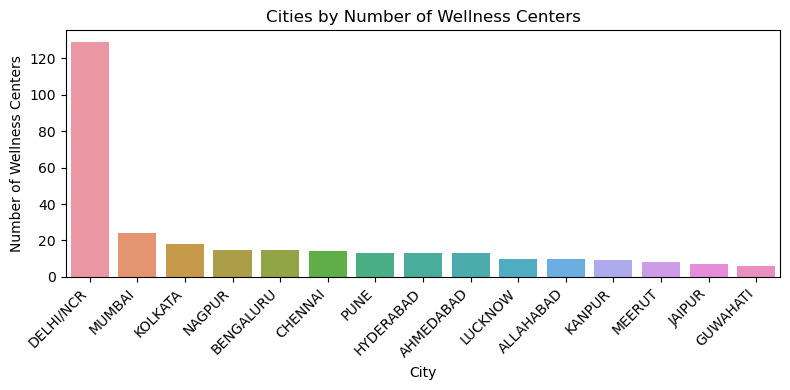

In [107]:
plt.figure(figsize=(8, 4))
city_counts = df['cityName'].value_counts().nlargest(15)
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.title('Cities by Number of Wellness Centers')
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Number of Wellness Centers')
plt.tight_layout()
plt.show()

### Visualizing the Number of Wellness Centers per City

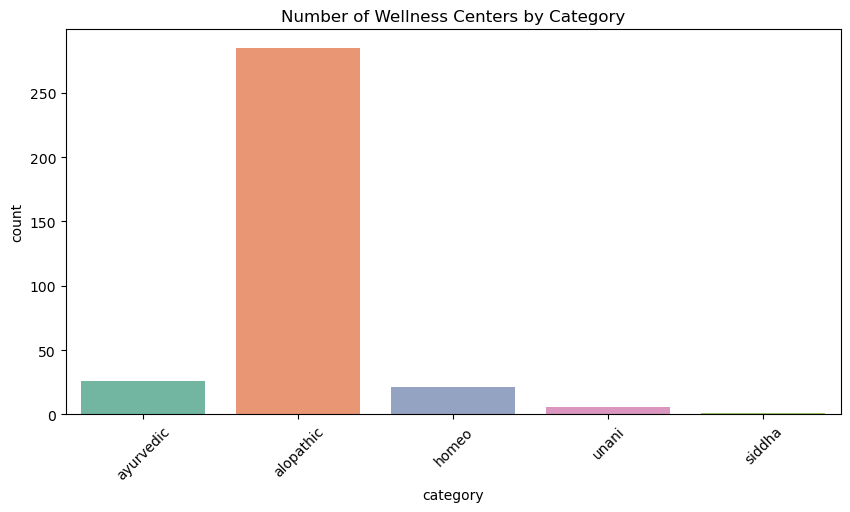

In [97]:
plt.figure(figsize=(10, 5))
sns.countplot(x="category", data=df, palette="Set2")
plt.title("Number of Wellness Centers by Category")
plt.xticks(rotation=45)
plt.show()

### Visualizing the Number of Wellness Centers per Category

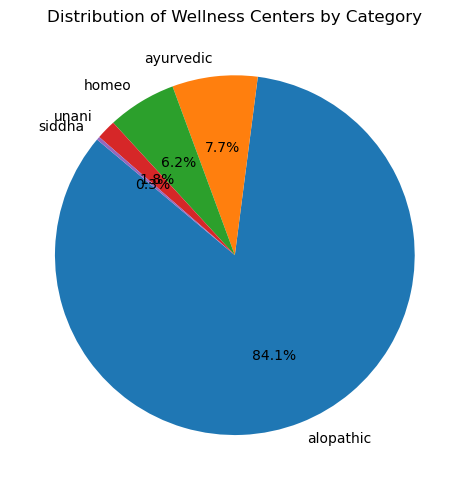

In [70]:
plt.figure(figsize=(5, 5))
category_counts = df['category'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Wellness Centers by Category')
plt.tight_layout()
plt.show()

### Visualizing the Pie Chart For Number of Wellness Centers Per Category

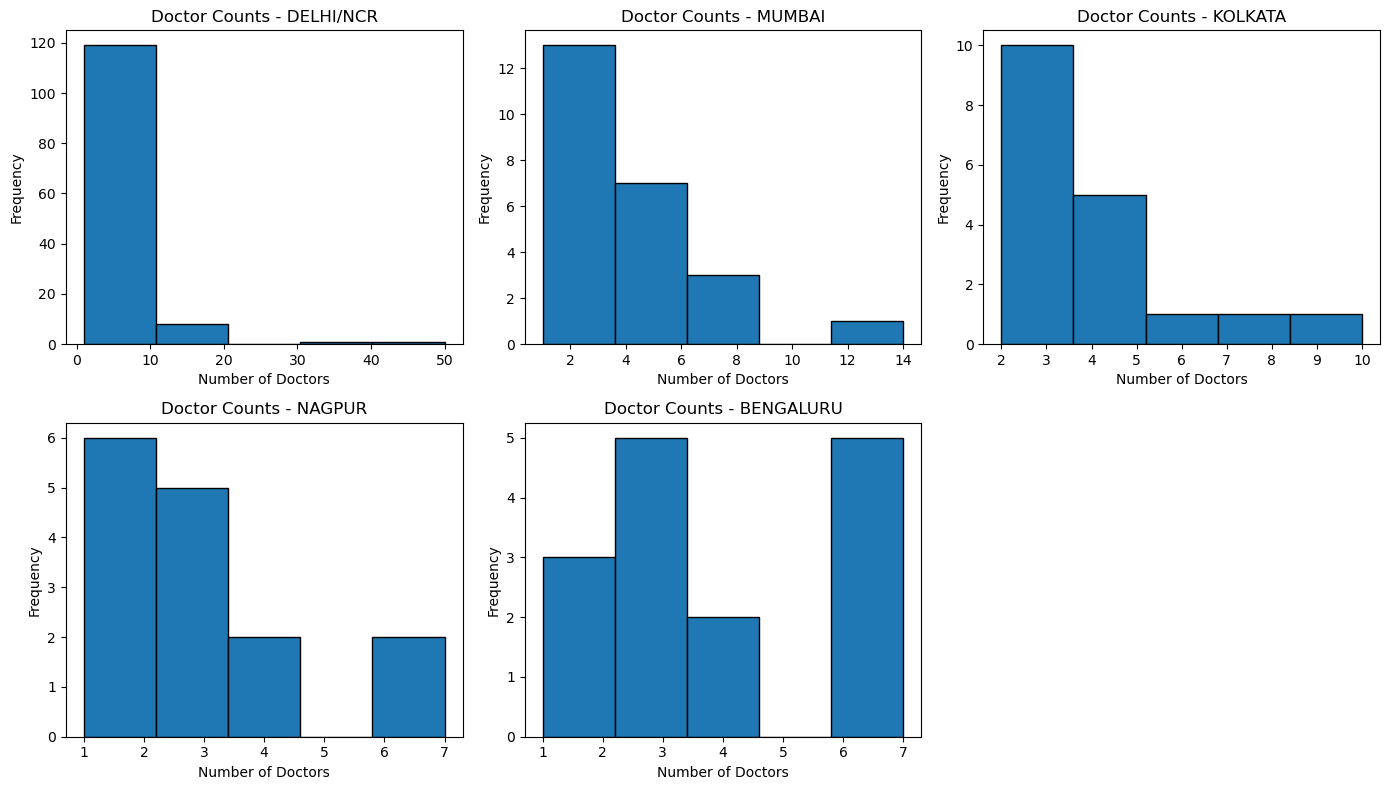

In [75]:
top_5_cities = df['cityName'].value_counts().nlargest(5).index
plt.figure(figsize=(14, 8))
for i, city in enumerate(top_5_cities):
    plt.subplot(2, 3, i + 1)
    plt.hist(df[df['cityName'] == city]['doctorCount'], bins=5, edgecolor='black')
    plt.title(f'Doctor Counts - {city}')
    plt.xlabel('Number of Doctors')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Visualization of top 5 cities with doctor count

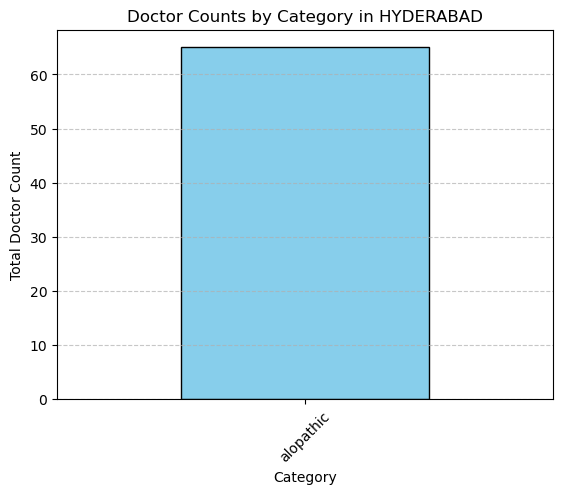

In [94]:
city_name = 'HYDERABAD'
city_df = df[df['cityName'] == city_name]
category_wise_counts = city_df.groupby('category')['doctorCount'].sum()
category_wise_counts.plot(kind='bar', edgecolor='black', color='skyblue')

plt.title(f'Doctor Counts by Category in {city_name}')
plt.xlabel('Category')
plt.ylabel('Total Doctor Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

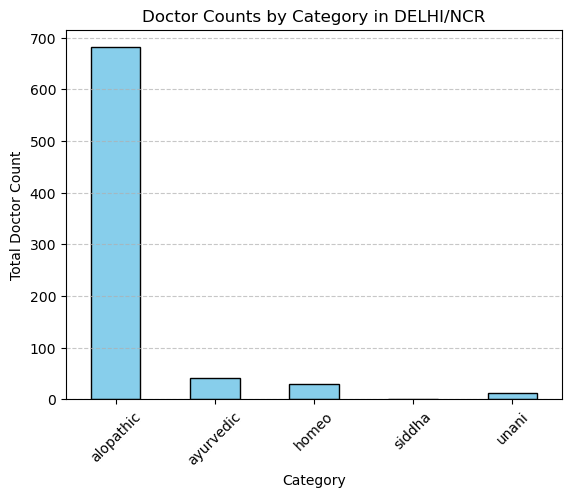

In [93]:
city_name = 'DELHI/NCR'
city_df = df[df['cityName'] == city_name]
category_wise_counts = city_df.groupby('category')['doctorCount'].sum()
category_wise_counts.plot(kind='bar', edgecolor='black', color='skyblue')

plt.title(f'Doctor Counts by Category in {city_name}')
plt.xlabel('Category')
plt.ylabel('Total Doctor Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

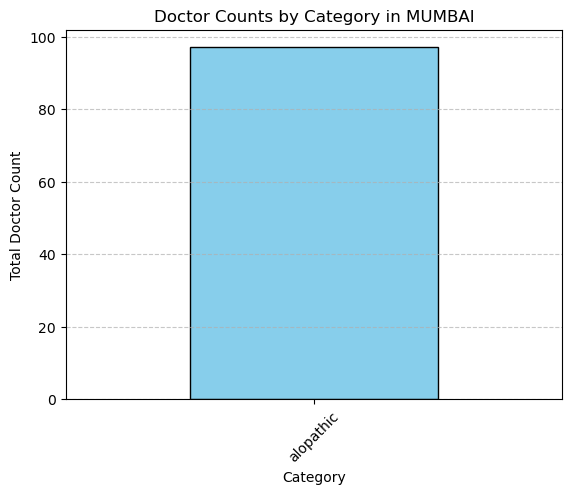

In [82]:
city_name = 'MUMBAI'
city_df = df[df['cityName'] == city_name]
category_wise_counts = city_df.groupby('category')['doctorCount'].sum()
category_wise_counts.plot(kind='bar', edgecolor='black', color='skyblue')

plt.title(f'Doctor Counts by Category in {city_name}')
plt.xlabel('Category')
plt.ylabel('Total Doctor Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

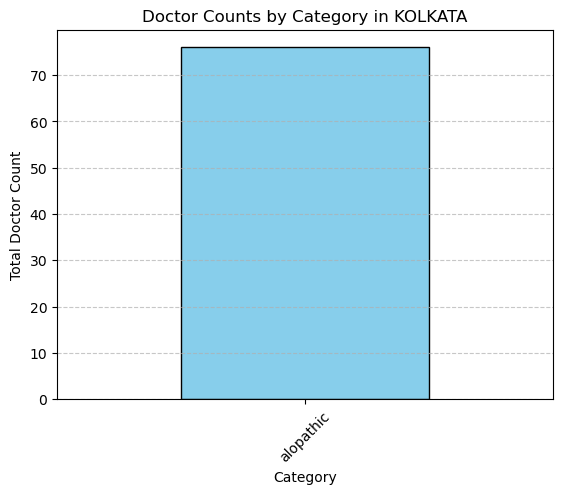

In [83]:
city_name = 'KOLKATA'
city_df = df[df['cityName'] == city_name]
category_wise_counts = city_df.groupby('category')['doctorCount'].sum()
category_wise_counts.plot(kind='bar', edgecolor='black', color='skyblue')

plt.title(f'Doctor Counts by Category in {city_name}')
plt.xlabel('Category')
plt.ylabel('Total Doctor Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

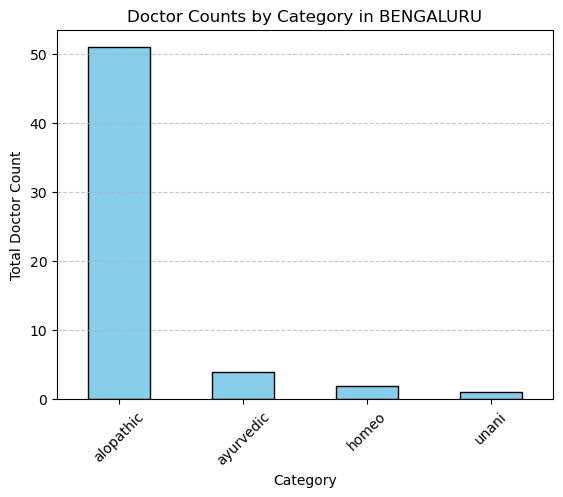

In [85]:
city_name = 'BENGALURU'
city_df = df[df['cityName'] == city_name]
category_wise_counts = city_df.groupby('category')['doctorCount'].sum()
category_wise_counts.plot(kind='bar', edgecolor='black', color='skyblue')

plt.title(f'Doctor Counts by Category in {city_name}')
plt.xlabel('Category')
plt.ylabel('Total Doctor Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

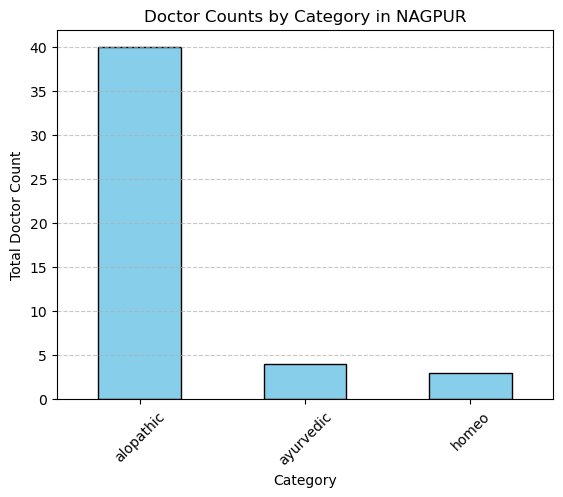

In [86]:
city_name = 'NAGPUR'
city_df = df[df['cityName'] == city_name]
category_wise_counts = city_df.groupby('category')['doctorCount'].sum()
category_wise_counts.plot(kind='bar', edgecolor='black', color='skyblue')

plt.title(f'Doctor Counts by Category in {city_name}')
plt.xlabel('Category')
plt.ylabel('Total Doctor Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

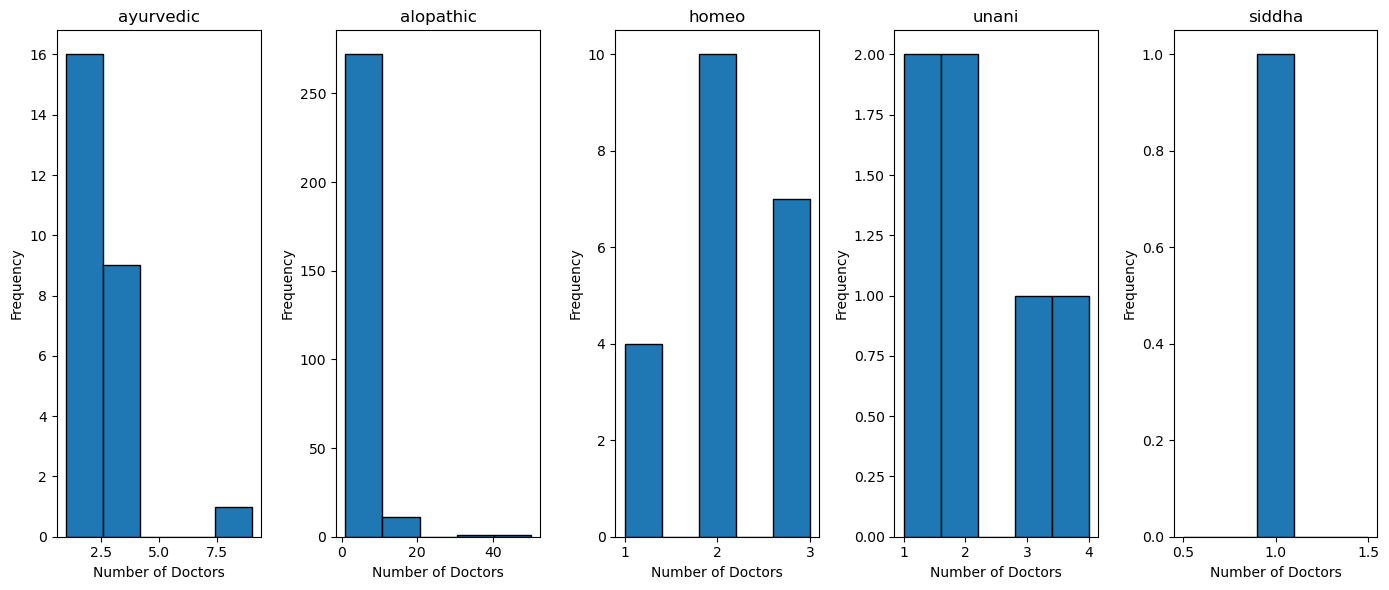

In [81]:
categories = df['category'].unique()
plt.figure(figsize=(14, 6))
for i, category in enumerate(categories):
    plt.subplot(1, len(categories), i + 1)
    category_df = df[df['category'] == category]
    plt.hist(category_df['doctorCount'], bins=5, edgecolor='black')
    plt.title(category)
    plt.xlabel('Number of Doctors')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Here it shows the doctors count for each category

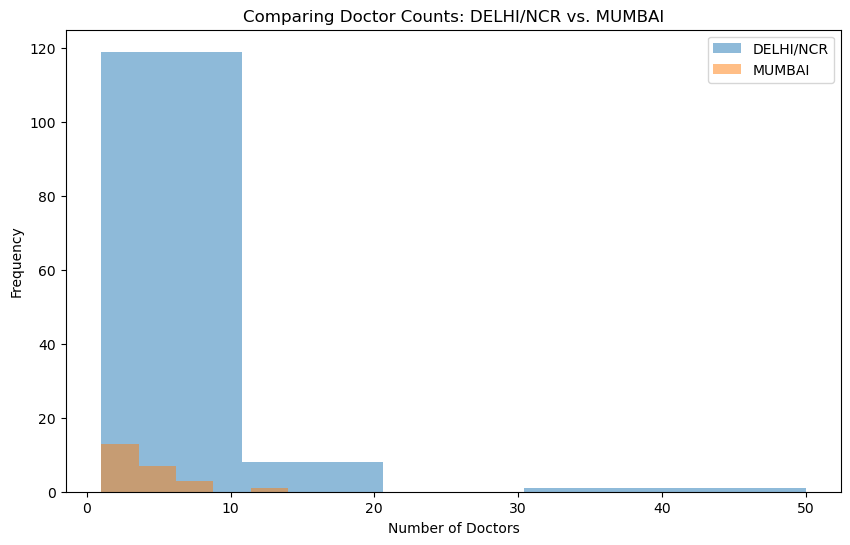

In [96]:
city1 = 'DELHI/NCR'
city2 = 'MUMBAI'

plt.figure(figsize=(10, 6))
plt.hist(df[df['cityName'] == city1]['doctorCount'], bins=5, alpha=0.5, label=city1)
plt.hist(df[df['cityName'] == city2]['doctorCount'], bins=5, alpha=0.5, label=city2)
plt.title(f'Comparing Doctor Counts: {city1} vs. {city2}')
plt.xlabel('Number of Doctors')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

### Here we can see how less doctors are there in Mumbai compared to Delhi

C:\ProgramData\New\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


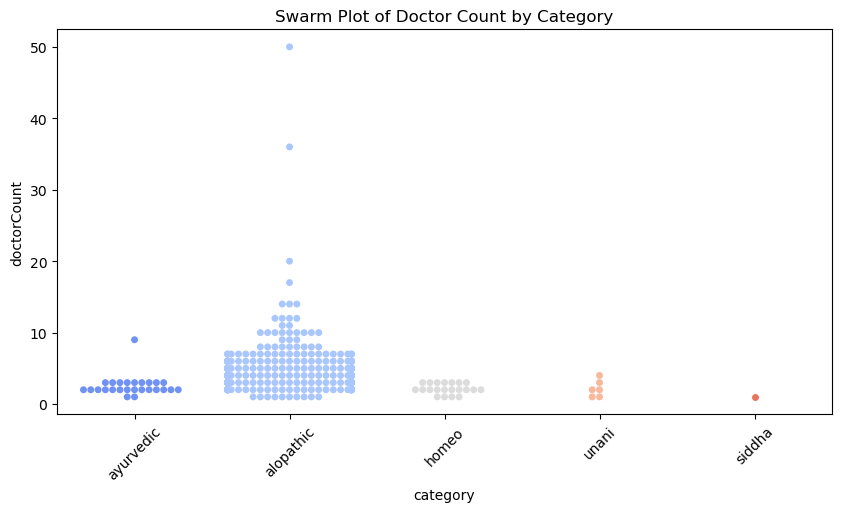

In [99]:
plt.figure(figsize=(10, 5))
sns.swarmplot(x="category", y="doctorCount", data=df, palette="coolwarm")
plt.title("Swarm Plot of Doctor Count by Category")
plt.xticks(rotation=45)
plt.show()

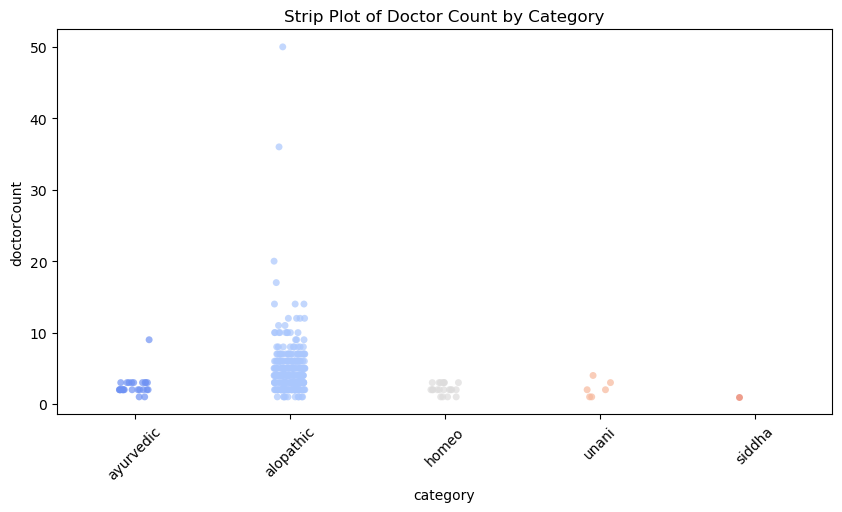

In [100]:
plt.figure(figsize=(10, 5))
sns.stripplot(x="category", y="doctorCount", data=df, palette="coolwarm", alpha=0.7)
plt.title("Strip Plot of Doctor Count by Category")
plt.xticks(rotation=45)
plt.show()

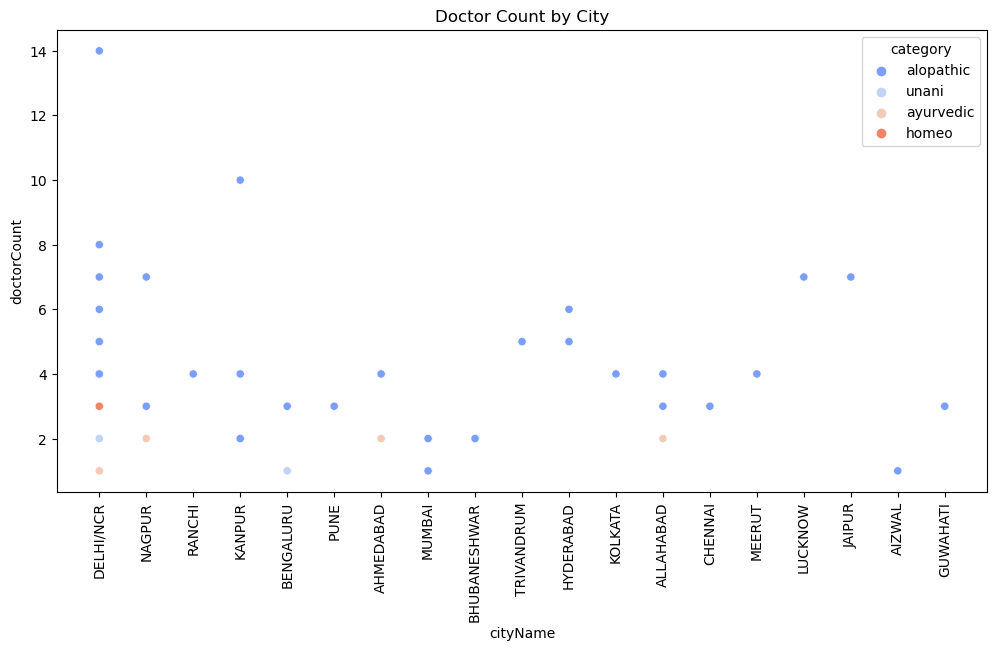

In [101]:
plt.figure(figsize=(12, 6))
sampled_df = df.sample(n=min(50, len(df)), random_state=42)
sns.scatterplot(x="cityName", y="doctorCount", hue="category", palette="coolwarm", data=sampled_df)
plt.title("Doctor Count by City")
plt.xticks(rotation=90)
plt.show()


### Delhi has more doctor count in alopathic category

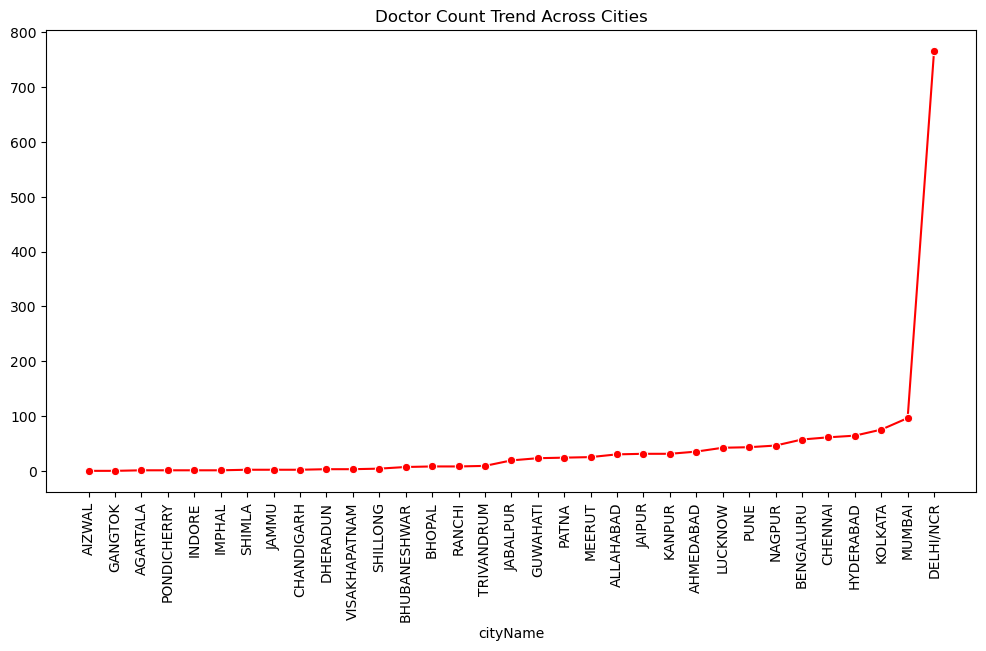

In [102]:
plt.figure(figsize=(12, 6))
city_trend = df.groupby("cityName")["doctorCount"].sum().sort_values()
sns.lineplot(x=city_trend.index, y=city_trend.values, marker="o", color="red")
plt.title("Doctor Count Trend Across Cities")
plt.xticks(rotation=90)
plt.show()


### DoctorCount Trendline of each city

## 4. Observations
- **Missing Data**: Some centers lack contact numbers and addresses.
- **Doctor Distribution**: Certain cities (e.g., Delhi/NCR) have higher doctor counts.
- **Category Insights**: Allopathic centers tend to have more doctors per center.
## 5. Conclusions and Recommendations
- **Resource Allocation**: Cities with fewer doctors may need more resources.
- **Data Completeness**: Efforts required to fill missing address/contact details.
- **Further Analysis**: Investigate patient satisfaction or outcomes if data is available.
- **Insights from Graphs**: 
  - Bar charts indicate a significant disparity in the distribution of wellness centers across cities, with metropolitan areas hosting a larger number of centers.
  - Pie charts reveal that Allopathic centers constitute a majority, reflecting potential preferences or government focus.
  - Heatmap analysis, if available, suggests minimal correlation between geographical location and doctor count, indicating other factors may influence resource allocation.
- **Strategic Actions**: 
  - Increase the number of wellness centers in underrepresented cities.
  - Address the disparity in doctor distribution by incentivizing doctors to work in less-served areas.
  - Prioritize data completeness to enable more accurate and informed decisions.